## Installation and GUI 

https://scqubits.readthedocs.io/en/latest/installation.html#

In [23]:
# pip install scqubits -U

In [24]:
# import scqubits.testing as sctest
# sctest.run()

In [25]:
import scqubits
scqubits.set_units('GHz') #setting units since it defaulted to 'MHz'
scqubits.GUI()

 c:\Users\Owner\anaconda3\Lib\site-packages\scqubits\core\units.py: 65

Container(children=[Sheet(children=[Card(children=[Img(layout=None, src='data:image/png;base64,iVBORw0KGgoAAAA…

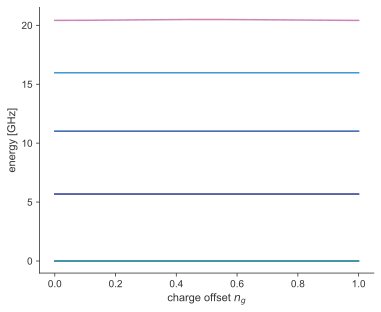

In [26]:
fig, ax = scqubits.GUI.fig_ax
ax.set_xlabel(r"charge offset $n_g$")
fig

## Basics


In [27]:
transmon = scqubits.Transmon(
    EJ=30.0,
    EC=1.2,
    ng=0.3,
    ncut=31
)

In [28]:
transmon

Transmon(**{'EJ': 30.0, 'EC': 1.2, 'ng': 0.3, 'ncut': 31, 'truncated_dim': 6, 'id_str': 'Transmon_5', 'evals_method': None, 'evals_method_options': None, 'esys_method': None, 'esys_method_options': None})

In [29]:
tmon = scqubits.Transmon.create()

Row(children=[Row(children=[ValidatedNumberField(class_='ml-2 py-0', dense=True, error=False, filled=True, lab…

In [30]:
scqubits.get_units()

'GHz'

## Energy Spectrum

In [31]:
transmon.eigenvals(evals_count=12)

array([-21.82665096,  -6.1637235 ,   8.0193175 ,  20.04763559,
        30.53712535,  38.70154385,  54.55166998,  67.49080961,
        90.05007774, 107.1126152 , 135.67738991, 156.68121682])

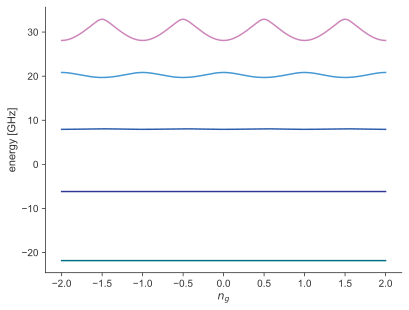

In [32]:
import numpy as np

ng_list = np.linspace(-2, 2, 220)
transmon.plot_evals_vs_paramvals('ng', ng_list, evals_count=5, subtract_ground=False); #this semicolon is to suppress the output of the last line

In [33]:
evals, evecs = transmon.eigensys()

In [34]:
evals

array([-21.82665096,  -6.1637235 ,   8.0193175 ,  20.04763559,
        30.53712535,  38.70154385])

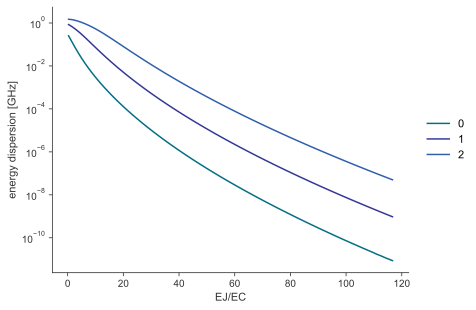

In [35]:
EJvals = np.linspace(0.1, 35, 100)
tmon.plot_dispersion_vs_paramvals('ng', 'EJ', EJvals, ref_param='EC', levels=(0,1,2));

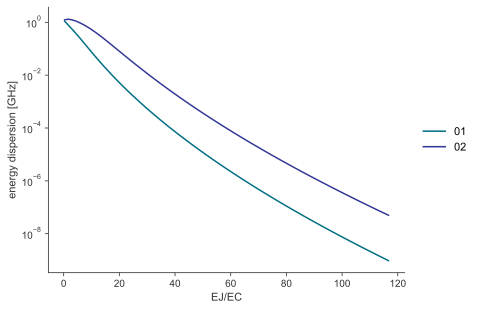

In [36]:
EJvals = np.linspace(0.1, 35, 100)
tmon.plot_dispersion_vs_paramvals('ng', 'EJ', EJvals, ref_param='EC', transitions=(((0,1), (0,2))));

## Wavefunctions

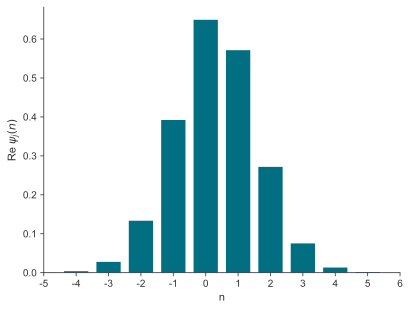

In [37]:
transmon.plot_n_wavefunction(esys=None, which=0, mode='real');

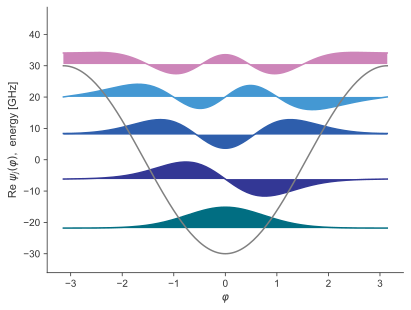

In [38]:
transmon.plot_phi_wavefunction(esys=None, which=[0,1,2,3,4], mode='real');

## Qubits

### Transmon

In [39]:
transmon = scqubits.Transmon(EJ=30.02,
                              EC=1.2,
                              ng=0.3,
                              ncut=31)

In [40]:
transmon = scqubits.Transmon.create()

Row(children=[Row(children=[ValidatedNumberField(class_='ml-2 py-0', dense=True, error=False, filled=True, lab…

In [43]:
tune_tmon = scqubits.TunableTransmon(
   EJmax=50.0,
   EC=0.5,
   d=0.01,
   flux=0.0,
   ng=0.0,
   ncut=30
)

In [44]:
tune_tmon.t1_effective(noise_channels=['t1_charge_impedance',
                        't1_flux_bias_line'],
                        common_noise_options=dict(T=0.050))

0.07048149517266065

### FLuxonium

In [45]:
fluxonium = scqubits.Fluxonium(EJ = 8.9,
                               EC = 2.5,
                               EL = 0.5,
                               flux = 0.33,
                               cutoff = 110)

In [46]:
fluxonium = scqubits.Fluxonium.create()

Row(children=[Row(children=[ValidatedNumberField(class_='ml-2 py-0', dense=True, error=False, filled=True, lab…

### Flux Qubit

In [47]:
EJ = 35.0
alpha = 0.6
fluxqubit = scqubits.FluxQubit(EJ1 = EJ,
                              EJ2 = EJ,
                              EJ3 = alpha*EJ,
                              ECJ1 = 1.0,
                              ECJ2 = 1.0,
                              ECJ3 = 1.0/alpha,
                              ECg1 = 50.0,
                              ECg2 = 50.0,
                              ng1 = 0.0,
                              ng2 = 0.0,
                              flux = 0.5,
                              ncut = 10)

In [48]:
fluxqubit = scqubits.FluxQubit.create()

Row(children=[Row(children=[ValidatedNumberField(class_='ml-2 py-0', dense=True, error=False, filled=True, lab…

### Zero pi

In [49]:
phi_grid = scqubits.Grid1d(-6*np.pi, 6*np.pi, 200)

zero_pi = scqubits.ZeroPi(grid = phi_grid,
                           EJ   = 0.25,
                           EL   = 10.0**(-2),
                           ECJ  = 0.5,
                           EC   = None,
                           ECS  = 10.0**(-3),
                           ng   = 0.1,
                           flux = 0.23,
                           ncut = 30)

In [50]:
zero_pi = scqubits.ZeroPi.create()

Row(children=[Row(children=[ValidatedNumberField(class_='ml-2 py-0', dense=True, error=False, filled=True, lab…

### FullZeroPi

In [51]:
phi_grid = scqubits.Grid1d(-6*np.pi, 6*np.pi, 200)

zero_pi = scqubits.FullZeroPi(grid = phi_grid,
                             EJ   = 0.25,
                             EL   = 10.0**(-2),
                             ECJ  = 0.5,
                             EC   = 0.001,
                             dEJ  = 0.05,
                             dCJ  = 0.05,
                             dEL  = 0.01,
                             dC   = 0.08,
                             ng   = 0.1,
                             flux = 0.23,
                             ncut = 30,
                             zeropi_cutoff = 10,
                             zeta_cutoff = 30)

In [53]:
zero_pi = scqubits.FullZeroPi.create()

Row(children=[Row(children=[ValidatedNumberField(class_='ml-2 py-0', dense=True, error=False, filled=True, lab…

### Cos 2phi

In [54]:
cos2phi_qubit = scqubits.Cos2PhiQubit(EJ = 15.0,
                                      ECJ = 2.0,
                                      EL = 1.0,
                                      EC = 0.04,
                                      dCJ = 0.0,
                                      dL = 0.6,
                                      dEJ = 0.0,
                                      flux = 0.5,
                                      ng = 0.0,
                                      ncut = 7,
                                      phi_cut = 7,
                                      zeta_cut = 30)

In [58]:
cos2phi_qubit = scqubits.Cos2PhiQubit.create()

Row(children=[Row(children=[ValidatedNumberField(class_='ml-2 py-0', dense=True, error=False, filled=True, lab…